In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score



In [2]:
train = pd.read_csv("data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [4]:
train.shape , test.shape

((8371, 17), (2791, 16))

In [5]:
train.isna().sum() , test.isna().sum()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 deposit      0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 dtype: int64)

In [6]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [7]:
train["job"].value_counts()

management       1923
blue-collar      1472
technician       1371
admin.           1017
services          671
retired           563
self-employed     307
unemployed        282
student           273
entrepreneur      244
housemaid         197
unknown            51
Name: job, dtype: int64

In [8]:
eduRatio = pd.DataFrame({'Job' : []})
for i in train["job"].unique():
    eduRatio = eduRatio.append(train[(train["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / train[(train["job"] == i)]["education"].value_counts().sum())
eduRatio["Job"] = train["job"].unique()
eduRatio

/var/folders/09/sd_yzlsd5hs0785zlz1vy3pm0000gn/T/ipykernel_1423/1964307075.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eduRatio = eduRatio.append(train[(train["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / train[(train["job"] == i)]["education"].value_counts().sum())
/var/folders/09/sd_yzlsd5hs0785zlz1vy3pm0000gn/T/ipykernel_1423/1964307075.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eduRatio = eduRatio.append(train[(train["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / train[(train["job"] == i)]["education"].value_counts().sum())
/var/folders/09/sd_yzlsd5hs0785zlz1vy3pm0000gn/T/ipykernel_1423/1964307075.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eduRatio =

,Job,education
secondary,technician,66.083151
primary,housemaid,53.299492
tertiary,management,84.451378
secondary,blue-collar,56.929348
secondary,services,80.923994
secondary,admin.,80.924287
secondary,unemployed,58.510638
secondary,student,51.648352
secondary,entrepreneur,40.983607
secondary,retired,42.451155


In [9]:
train.loc[(train.job == "unknown") & (train.education == "secondary"),"job"] = "services"
train.loc[(train.job == "unknown") & (train.education == "primary"),"job"] = "housemaid"
train.loc[(train.job == "unknown") & (train.education == "tertiary"),"job"] = "management"
train.loc[(train.job == "unknown"),"job"] = "blue-collar"

In [10]:
train["job"].value_counts()

management       1930
blue-collar      1499
technician       1371
admin.           1017
services          683
retired           563
self-employed     307
unemployed        282
student           273
entrepreneur      244
housemaid         202
Name: job, dtype: int64

In [11]:
train["marital"].value_counts() , test["marital"].value_counts()

(married     4744
 single      2645
 divorced     982
 Name: marital, dtype: int64,
 married     1607
 single       873
 divorced     311
 Name: marital, dtype: int64)

In [12]:
train["education"].value_counts()

secondary    4113
tertiary     2754
primary      1128
unknown       376
Name: education, dtype: int64

In [13]:
train.loc[(train.education == "unknown") & (train.job == "admin."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "management"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "services"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "technician."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "retired"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "blue-collar"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "housemaid."),"education"] = "primary"
train.loc[(train.education == "unknown") & (train.job == "self-employed"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "student"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "entrepreneur"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "unemployed"),"education"] = "secondary"
train.loc[(train.education == "unknown"),"education"] = "secondary"

In [14]:
train["education"].value_counts()

secondary    4441
tertiary     2802
primary      1128
Name: education, dtype: int64

In [15]:
test["education"].value_counts()

secondary    1363
tertiary      935
primary       372
unknown       121
Name: education, dtype: int64

In [16]:
train["default"].value_counts()

no     8244
yes     127
Name: default, dtype: int64

In [17]:
train["housing"].value_counts()

no     4354
yes    4017
Name: housing, dtype: int64

In [18]:
train["contact"].value_counts()

cellular     6041
unknown      1763
telephone     567
Name: contact, dtype: int64

In [19]:
train["contact"].replace(["unknown"],train["contact"].mode(),inplace = True) 

In [20]:
train["contact"].value_counts()

cellular     7804
telephone     567
Name: contact, dtype: int64

In [21]:
train["poutcome"].value_counts()

unknown    6269
failure     895
success     807
other       400
Name: poutcome, dtype: int64

In [22]:
train.drop(columns = ["day","month"],inplace = True)

In [23]:
train["deposit"].value_counts() 

no     4428
yes    3943
Name: deposit, dtype: int64

In [24]:
ohe = OneHotEncoder(sparse = False)
train = pd.concat((train , pd.DataFrame(ohe.fit_transform(train["job"].to_frame()),columns = "job_" + np.sort(train["job"].unique()))),axis = 1)
train.drop(columns = ["job"],inplace = True)
train = pd.concat((train , pd.DataFrame(ohe.fit_transform(train["marital"].to_frame()),columns = "marital_" + np.sort(train["marital"].unique()))),axis = 1)
train.drop(columns = ["marital"],inplace = True)

In [25]:
train.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,38,tertiary,no,127,yes,no,cellular,113,1,50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,41,primary,no,365,no,no,cellular,203,5,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,39,tertiary,no,2454,yes,no,cellular,716,3,263,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,49,primary,no,6215,yes,no,cellular,549,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,37,secondary,no,1694,yes,yes,cellular,404,2,251,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
train.loc[(train.education == "tertiary"),"education"] = 2
train.loc[(train.education == "secondary") ,"education"] = 1
train.loc[(train.education == "primary"),"education"] = 0
train.loc[(train.default == "yes"),"default"] = 1
train.loc[(train.default == "no") ,"default"] = 0

In [27]:
train.balance.sort_values() 

6714    -3058
4582    -2712
1137    -2049
5106    -1965
2345    -1944
        ...  
2412    52587
5283    52587
5208    56831
1263    66653
248     81204
Name: balance, Length: 8371, dtype: int64

In [28]:
train.loc[(train.balance > 66721),"balance"] = 66721
train["balance"]= train["balance"] / 66721

In [29]:
train.loc[(train.housing == "yes"),"housing"] = 1
train.loc[(train.housing == "no") ,"housing"] = 0
train.loc[(train.loan == "yes"),"loan"] = 1
train.loc[(train.loan == "no") ,"loan"] = 0
train.loc[(train.contact == "telephone"),"contact"] = 1 
train.loc[(train.contact == "cellular") ,"contact"] = 0
train.drop(columns = ["duration"],inplace = True)

In [30]:
train.loc[(train.pdays == -1),"pdays"] = 999

In [31]:
train.head()

,age,education,default,balance,housing,loan,contact,campaign,pdays,previous,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,38,2,0,0.001903,1,0,0,1,50,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,41,0,0,0.005471,0,0,0,5,999,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,39,2,0,0.036780,1,0,0,3,263,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,49,0,0,0.093149,1,0,0,1,999,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,37,1,0,0.025389,1,1,0,2,251,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                8371 non-null   int64  
 1   education          8371 non-null   object 
 2   default            8371 non-null   object 
 3   balance            8371 non-null   float64
 4   housing            8371 non-null   object 
 5   loan               8371 non-null   object 
 6   contact            8371 non-null   object 
 7   campaign           8371 non-null   int64  
 8   pdays              8371 non-null   int64  
 9   previous           8371 non-null   int64  
 10  poutcome           8371 non-null   object 
 11  deposit            8371 non-null   object 
 12  job_admin.         8371 non-null   float64
 13  job_blue-collar    8371 non-null   float64
 14  job_entrepreneur   8371 non-null   float64
 15  job_housemaid      8371 non-null   float64
 16  job_management     8371 

Before training we should transform object dtypes to int because some classifiers won't work with object dtype.

In [33]:
train.education = train.education.astype(int)
train.default = train.default.astype(int)
train.housing = train.housing.astype(int)
train.loan = train.loan.astype(int)
train.contact = train.contact.astype(int)


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                8371 non-null   int64  
 1   education          8371 non-null   int64  
 2   default            8371 non-null   int64  
 3   balance            8371 non-null   float64
 4   housing            8371 non-null   int64  
 5   loan               8371 non-null   int64  
 6   contact            8371 non-null   int64  
 7   campaign           8371 non-null   int64  
 8   pdays              8371 non-null   int64  
 9   previous           8371 non-null   int64  
 10  poutcome           8371 non-null   object 
 11  deposit            8371 non-null   object 
 12  job_admin.         8371 non-null   float64
 13  job_blue-collar    8371 non-null   float64
 14  job_entrepreneur   8371 non-null   float64
 15  job_housemaid      8371 non-null   float64
 16  job_management     8371 

In [35]:
train = pd.concat((train , pd.DataFrame(ohe.fit_transform(train["poutcome"].to_frame()),columns = "poutcome_" + np.sort(train["poutcome"].unique()))),axis = 1)
train.drop(columns = ["poutcome"],inplace = True)

In [36]:
train.loc[(train.deposit == "yes"),"deposit"] = 1 
train.loc[(train.deposit == "no") ,"deposit"] = 0

In [37]:
train.deposit = train.deposit.astype(int)

<AxesSubplot:>

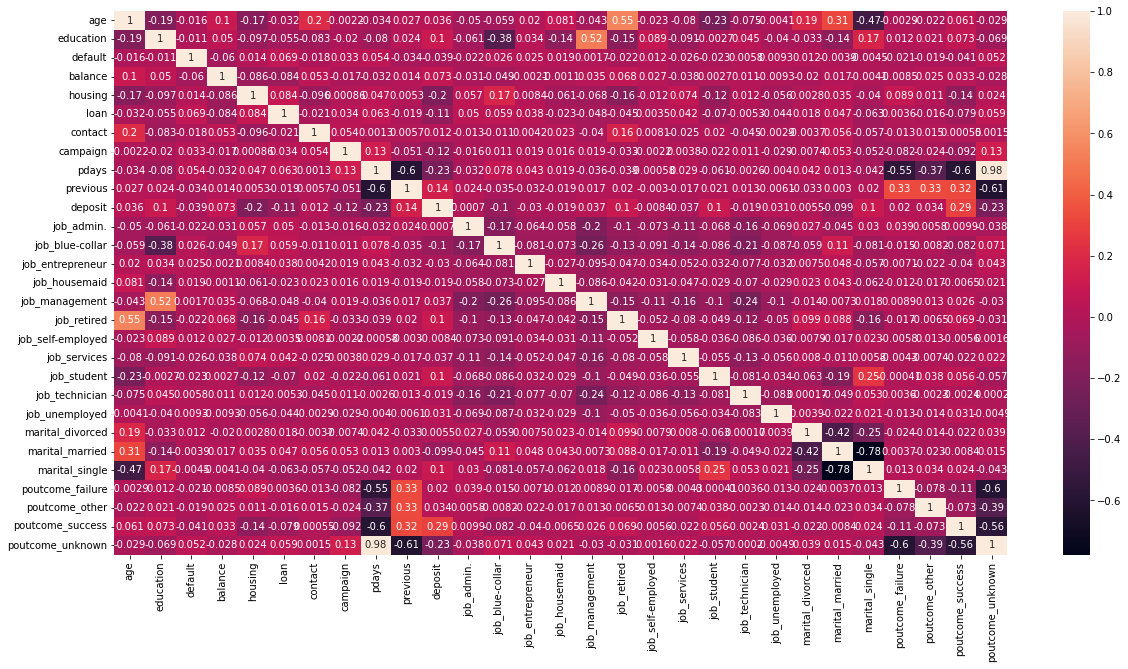

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot = True)

# 3.Training :

**Lets split the data**

In [39]:
y = train.deposit.to_frame()
X = train.drop(columns = ["deposit"])
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state = 10)

In [41]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predlr = lr.predict(X_test)
cmlr = confusion_matrix(y_test, y_predlr)
cmlr
print("accuracy: %.2f" %accuracy_score(y_test, y_predlr))
print("Precision : %.3f" % precision_score(y_test, y_predlr))
print("Recall : %.3f" % recall_score(y_test, y_predlr))
print("F1 : %.3f" % f1_score(y_test, y_predlr))
print("confusion matrix",cmlr)

accuracy: 0.66
Precision : 0.697
Recall : 0.537
F1 : 0.607
confusion matrix [[848 236]
 [467 542]]


/Users/generalsubhra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/generalsubhra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X, y)
y_sm.deposit.value_counts()

0    4428
1    4428
Name: deposit, dtype: int64

In [43]:
X_train_sm , X_test_sm , y_train_sm , y_test_sm = train_test_split(X_sm,y_sm, test_size = 0.25, random_state = 10)
lr2 = LogisticRegression()
lr2.fit(X_train_sm,y_train_sm)
y_predlr2 = lr2.predict(X_test_sm)
cmlr2 = confusion_matrix(y_test_sm, y_predlr2)
acclr2 = accuracy_score(y_test_sm, y_predlr2)
cmlr2 , acclr2


print("accuracy: %.2f" %accuracy_score(y_test_sm, y_predlr2))
print("Precision : %.3f" % precision_score(y_test_sm, y_predlr2))
print("Recall : %.3f" % recall_score(y_test_sm, y_predlr2))
print("F1 : %.3f" % f1_score(y_test_sm, y_predlr2))
print("confusion matrix",cmlr2)

accuracy: 0.67
Precision : 0.690
Recall : 0.616
F1 : 0.651
confusion matrix [[799 307]
 [425 683]]


/Users/generalsubhra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/generalsubhra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
y_predsvc = svc.predict(X_test_sm)
cmsvc = confusion_matrix(y_test_sm, y_predsvc)
cmsvc 

print("accuracy: %.2f" %accuracy_score(y_test_sm, y_predsvc))
print("Precision : %.3f" % precision_score(y_test_sm, y_predsvc))
print("Recall : %.3f" % recall_score(y_test_sm, y_predsvc))
print("F1 : %.3f" % f1_score(y_test_sm, y_predsvc))
print("confusion matrix",cmlr2)

/Users/generalsubhra/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.60
Precision : 0.700
Recall : 0.341
F1 : 0.459
confusion matrix [[799 307]
 [425 683]]


**KNN**

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train_sm, y_train_sm)
y_predknn = knn.predict(X_test_sm)
cmknn = confusion_matrix(y_test_sm, y_predknn)
cmknn 

print("accuracy: %.2f" %accuracy_score(y_test_sm, y_predknn))
print("Precision : %.3f" % precision_score(y_test_sm, y_predknn))
print("Recall : %.3f" % recall_score(y_test_sm, y_predknn))
print("F1 : %.3f" % f1_score(y_test_sm, y_predknn))
print("confusion matrix",cmknn)



accuracy: 0.65
Precision : 0.649
Recall : 0.653
F1 : 0.651
confusion matrix [[715 391]
 [385 723]]


/Users/generalsubhra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Random Forest Classifier**

In [46]:


rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
y_predrf = rf.predict(X_test_sm)
cmrf = confusion_matrix(y_test_sm, y_predrf)
cmrf 

print("accuracy: %.2f" %accuracy_score(y_test_sm, y_predrf))
print("Precision : %.3f" % precision_score(y_test_sm, y_predrf))
print("Recall : %.3f" % recall_score(y_test_sm, y_predrf))
print("F1 : %.3f" % f1_score(y_test_sm, y_predrf))
print("confusion matrix",cmrf)


/var/folders/09/sd_yzlsd5hs0785zlz1vy3pm0000gn/T/ipykernel_1423/1273975910.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_sm, y_train_sm)


accuracy: 0.68
Precision : 0.703
Recall : 0.625
F1 : 0.662
confusion matrix [[814 292]
 [416 692]]


In [56]:
result = pd.DataFrame()
result['deposit'] =y_predrf
result['deposit'].replace(0,'no',inplace=True)
result['deposit'].replace(1,'yes',inplace=True)
result.to_csv('final.csv', header=True, index=False)